In [160]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import importlib
warnings.filterwarnings('ignore')

In [303]:
import analysis.data.dataframe_creation as dataframe_creation
importlib.reload(dataframe_creation)
from analysis.data.dataframe_creation import pipeline
sd = "2018-01-01"
ed = "2024-01-01"
dataset = pipeline(sd, ed)

[*********************100%***********************]  1 of 1 completed
[                       0%                       ]

Total number of tickers 502


[*********************100%***********************]  502 of 502 completed

5 Failed downloads:
['GEV', 'SOLV', 'SW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2018-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1514782800, endDate = 1704085200")')
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2018-01-01 -> 2024-01-01)')
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')



Null values: False
NaN values: False

Creating features
The dataset has 485 assets
The dataset has 16 predictors:
Ticker
Yavg_return
Yavg_volatility
beta
mkt_corr
Davg_span
Davg_volume
D_eSkewness
D_eVaR
D_eCVaR
D_eCurtosis
Sharpe_ratio
totalEsg
environmentScore
socialScore
governanceScore
industry


Dataset creation finished



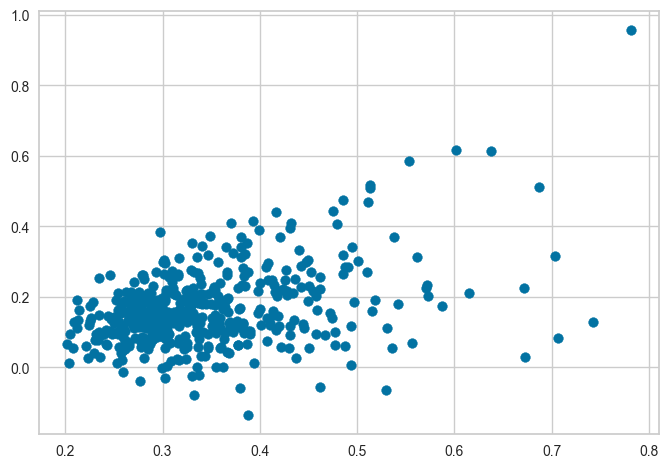

In [304]:
plt.scatter(dataset["Yavg_volatility"], dataset["Yavg_return"])
plt.show()

In [305]:
outliers = outliers = dataset[
    (dataset["Yavg_return"] > 0.8)]["Ticker"].unique()
final_dataframe = dataset[~dataset["Ticker"].isin(outliers)]
final_dataframe.head()

,Ticker,Yavg_return,Yavg_volatility,beta,mkt_corr,Davg_span,Davg_volume,D_eSkewness,D_eVaR,D_eCVaR,D_eCurtosis,Sharpe_ratio,totalEsg,environmentScore,socialScore,governanceScore,industry
0,A,0.170254,0.290317,1.006774,0.707046,2.268208,1.961764e+06,-0.134994,-0.000283,-0.000401,4.334453,0.517552,11.36,1.19,6.23,3.93,Life Sciences Tools and Services
1,AAPL,0.309906,0.316770,1.238242,0.796984,2.378506,1.073273e+08,-0.036493,-0.000292,-0.000426,4.924354,0.915194,16.79,0.55,7.52,8.72,Technology
2,ABBV,0.159055,0.273195,0.657252,0.490510,2.003774,7.196053e+06,-0.845040,-0.000286,-0.000483,13.941074,0.508994,26.10,1.78,15.70,8.62,Biotechnology
3,ABT,0.155088,0.257788,0.853280,0.674865,1.733056,5.701730e+06,0.048217,-0.000290,-0.000434,6.096863,0.524026,22.21,1.81,13.84,6.56,Health Care
4,ACGL,0.204344,0.314158,0.979197,0.635493,0.905297,1.859299e+06,-0.321692,-0.000771,-0.001249,11.651915,0.586789,20.27,1.57,9.92,8.78,Insurance


In [306]:
stock_data_clustering = final_dataframe[["Yavg_return",	"Yavg_volatility"]]

stock_data_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484 entries, 0 to 484
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Yavg_return      484 non-null    float64
 1   Yavg_volatility  484 non-null    float64
dtypes: float64(2)
memory usage: 11.3 KB


In [307]:
from sklearn.preprocessing import MinMaxScaler
for attr in stock_data_clustering.columns:
    scaler = MinMaxScaler()
    stock_data_clustering[attr] = scaler.fit_transform(stock_data_clustering[attr].values.reshape(-1, 1)).flatten()

In [308]:

from analysis.clustering.kmeans_clustering import run_kmeans
clusters = range(2, 20)
runs = 60
meanDistortions, sil_score, inertias = run_kmeans(clusters, stock_data_clustering, runs)
        # print("\nNumber of Clusters:", k, "\tAverage Distortion:", distortion)
        # print("For n_clusters = {}, silhouette score is {}".format(k, score))

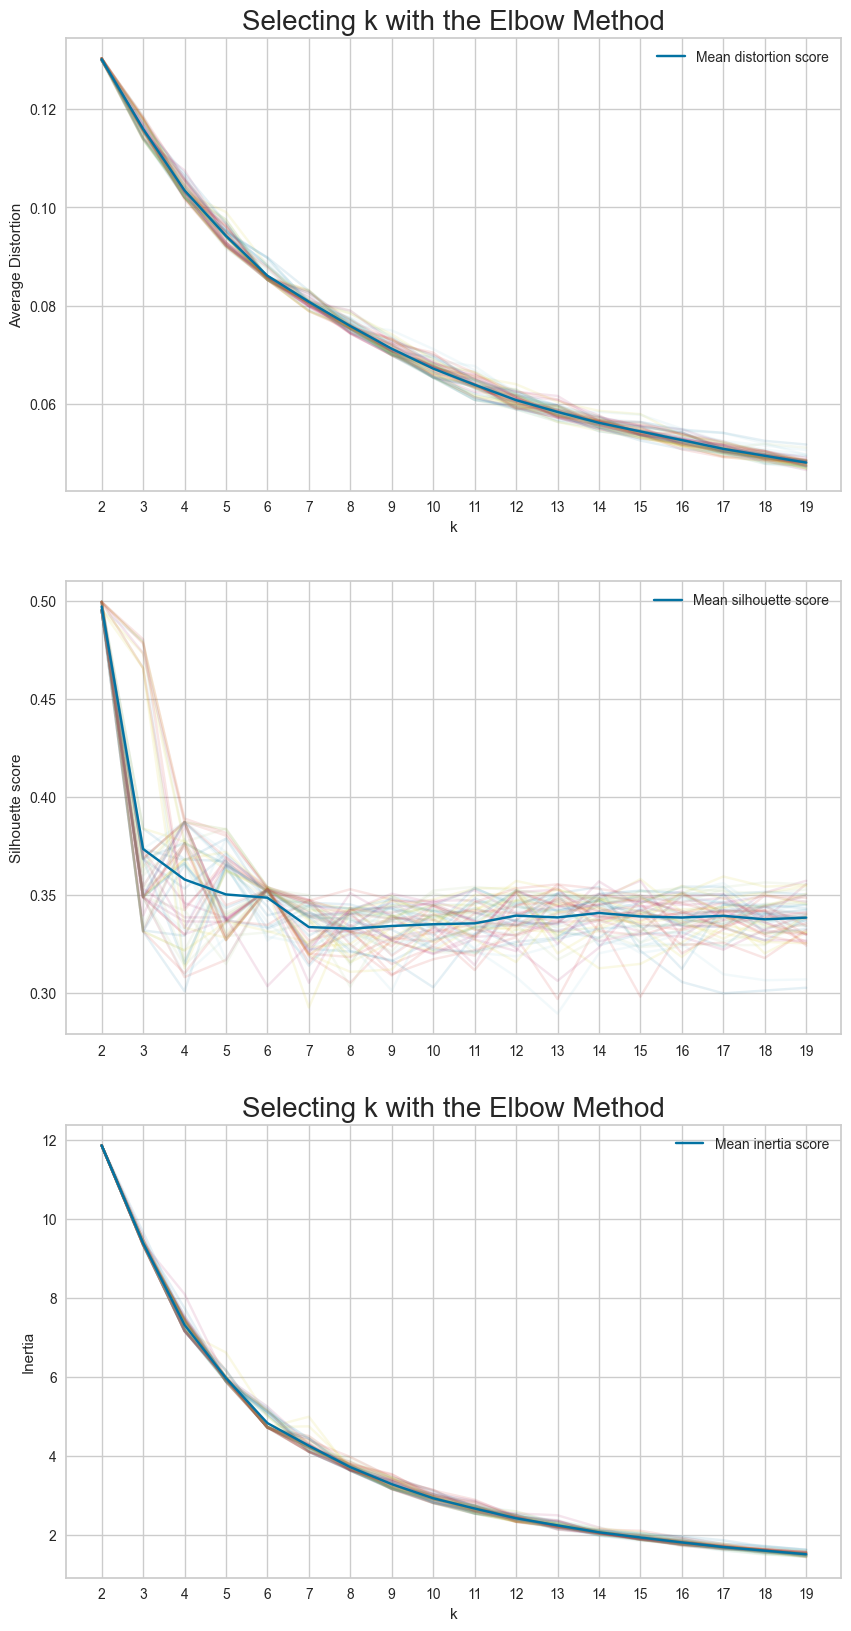

In [309]:
from analysis.data.plotting import plot_kmeans
plot_kmeans(runs, clusters, meanDistortions, sil_score, inertias)

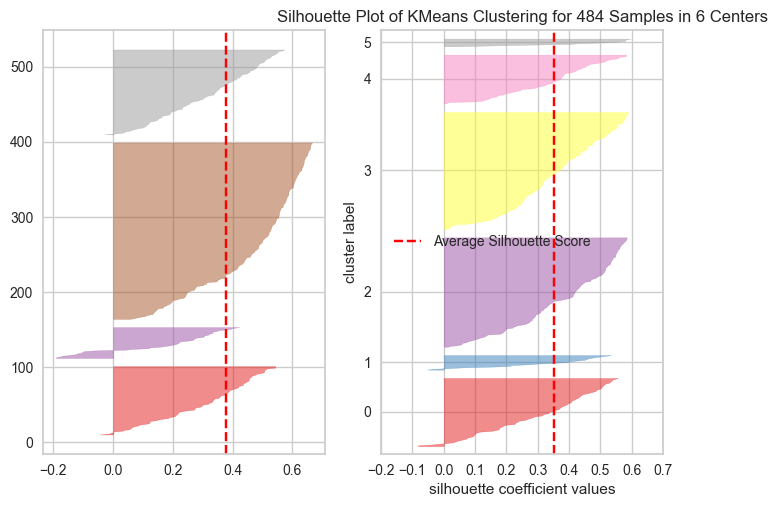

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 484 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [310]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
plt.subplot(1,2,1)
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(stock_data_clustering)
plt.subplot(1,2,2)
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))

visualizer.fit(stock_data_clustering)

visualizer.show()

In [311]:
N_SECTORS = 6

kmeans = KMeans(n_clusters=N_SECTORS, random_state=0)
kmeans.fit(stock_data_clustering)
final_dataframe["Sector"] = kmeans.labels_
final_dataframe.head()

,Ticker,Yavg_return,Yavg_volatility,beta,mkt_corr,Davg_span,Davg_volume,D_eSkewness,D_eVaR,D_eCVaR,D_eCurtosis,Sharpe_ratio,totalEsg,environmentScore,socialScore,governanceScore,industry,Sector
0,A,0.170254,0.290317,1.006774,0.707046,2.268208,1.961764e+06,-0.134994,-0.000283,-0.000401,4.334453,0.517552,11.36,1.19,6.23,3.93,Life Sciences Tools and Services,0
1,AAPL,0.309906,0.316770,1.238242,0.796984,2.378506,1.073273e+08,-0.036493,-0.000292,-0.000426,4.924354,0.915194,16.79,0.55,7.52,8.72,Technology,4
2,ABBV,0.159055,0.273195,0.657252,0.490510,2.003774,7.196053e+06,-0.845040,-0.000286,-0.000483,13.941074,0.508994,26.10,1.78,15.70,8.62,Biotechnology,0
3,ABT,0.155088,0.257788,0.853280,0.674865,1.733056,5.701730e+06,0.048217,-0.000290,-0.000434,6.096863,0.524026,22.21,1.81,13.84,6.56,Health Care,0
4,ACGL,0.204344,0.314158,0.979197,0.635493,0.905297,1.859299e+06,-0.321692,-0.000771,-0.001249,11.651915,0.586789,20.27,1.57,9.92,8.78,Insurance,4


In [ ]:
cluster_profile = final_dataframe.groupby("Sector").mean(numeric_only=True)

# Add counts for the number of stocks in each cluster
cluster_profile["Count"] = final_dataframe.groupby("Sector")["Ticker"].count().values
cluster_profile["Sharpe_ratio"] = (cluster_profile["Yavg_return"]-0.02)/cluster_profile["Yavg_volatility"]

cluster_profile.style.highlight_max(color="green", axis=0, subset=["beta", "D_eSkewness",	"Yavg_return", "Sharpe_ratio", "Davg_volume"])
cluster_profile.style.highlight_min(color="green", axis=0, subset=["beta", "Davg_span", "D_eCurtosis",	"Yavg_volatility", "D_eVaR", "D_eCVaR", "totalEsg",	"environmentScore",	"socialScore",	"governanceScore"])

,Yavg_return,Yavg_volatility,beta,mkt_corr,Davg_span,Davg_volume,D_eSkewness,D_eVaR,D_eCVaR,D_eCurtosis,Sharpe_ratio,totalEsg,environmentScore,socialScore,governanceScore,Count
Sector,,,,,,,,,,,,,,,,
0,0.126260,0.272155,0.804578,0.599050,2.639178,3549243.774023,-0.164716,-0.000382,-0.000610,11.725305,0.390440,20.488112,6.143112,9.064949,5.279847,196
1,0.398511,0.488431,1.348550,0.572312,4.959552,27252647.165894,0.078436,-0.001084,-0.001684,11.472438,0.774952,19.771667,6.113103,8.417931,5.216552,30
2,0.141944,0.448964,1.288208,0.587362,2.549813,6973865.986243,-0.086304,-0.001040,-0.001657,13.846505,0.271613,21.530000,6.455000,8.946481,6.127963,54
3,0.078211,0.347453,1.034547,0.606138,2.008640,5290505.530966,-0.107989,-0.000790,-0.001254,12.896698,0.167537,20.789412,5.383412,9.367412,6.038588,88
4,0.240272,0.340819,1.081369,0.646874,5.678579,5298893.944073,0.012754,-0.000406,-0.000634,10.210256,0.646303,18.763883,4.320000,8.855631,5.588641,104
5,0.172979,0.625919,1.502762,0.491317,2.518135,10231385.574332,0.045046,-0.001752,-0.003117,21.088926,0.244408,28.146667,12.430833,10.224167,5.491667,12


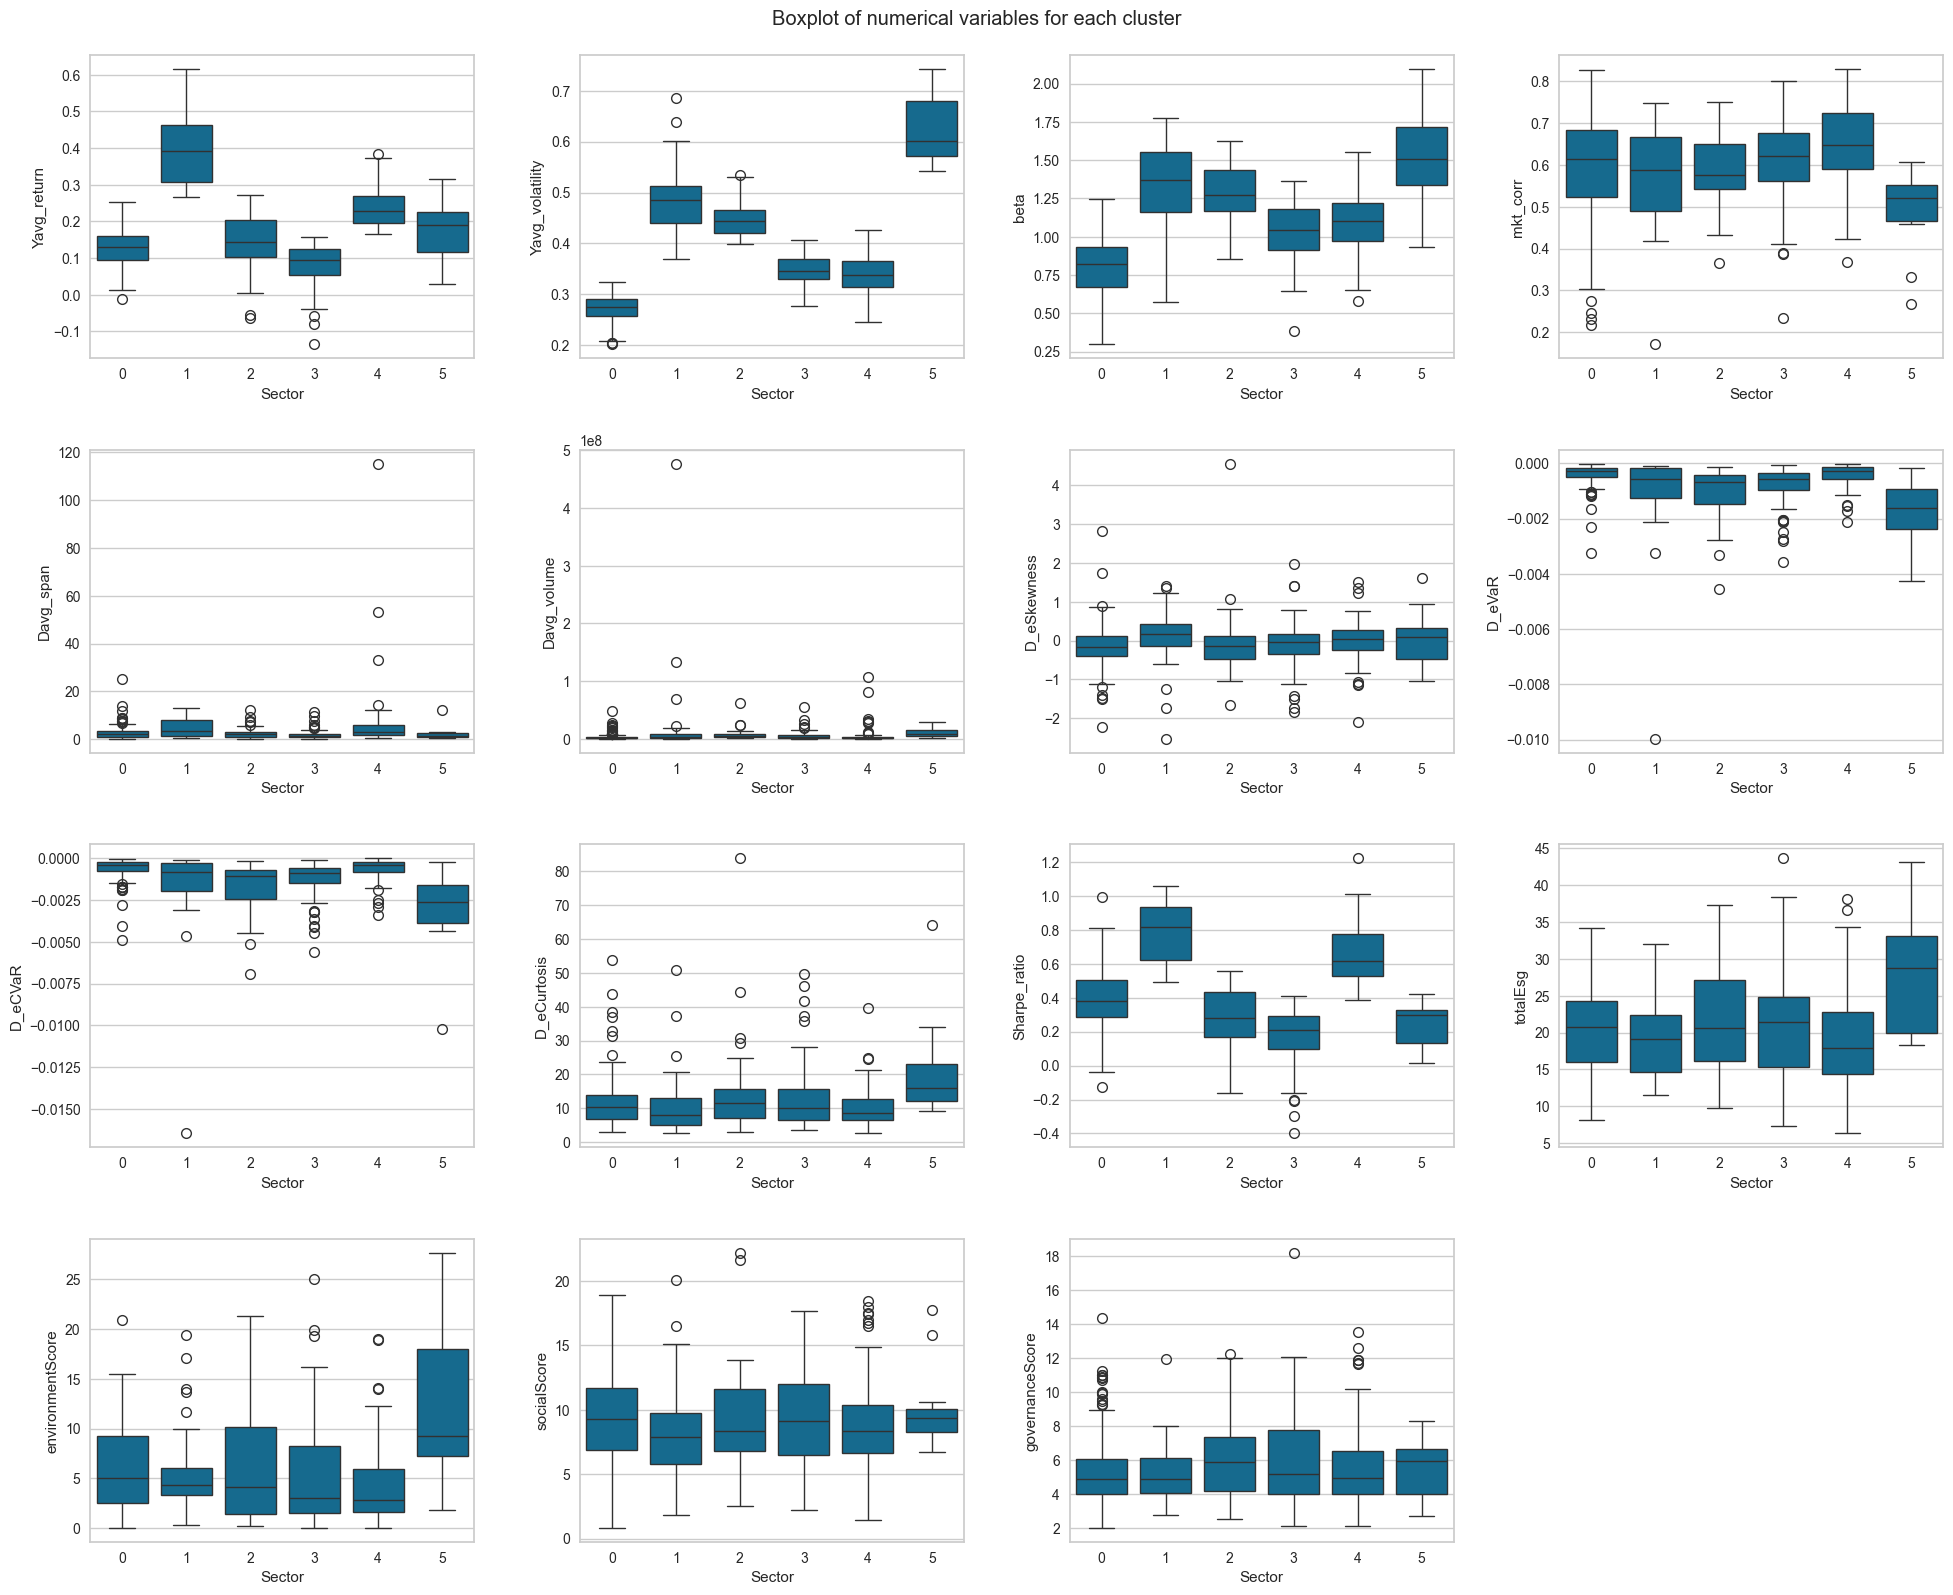

In [314]:
plt.figure(figsize=(20, 20))
import seaborn as sns
plt.suptitle("Boxplot of numerical variables for each cluster")
i = 1
for i, variable in enumerate(final_dataframe):
  if variable not in ["Ticker", "industry", "Sector"]:
    plt.subplot(5, 4, i)
    sns.boxplot(data=final_dataframe, x="Sector", y=variable)
    i += 1

plt.tight_layout(pad=2.0)

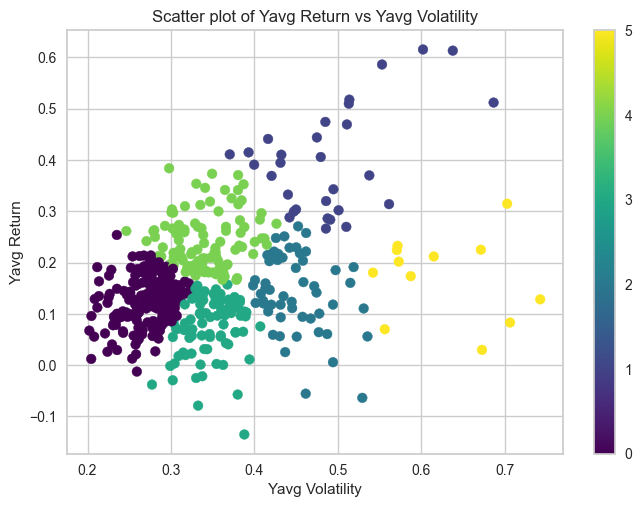

In [315]:
plt.scatter(
    final_dataframe["Yavg_volatility"], 
    final_dataframe["Yavg_return"], 
    c=final_dataframe["Sector"],  # Use c for color mapping
    cmap='viridis',  # Optional: Choose a colormap
    
)

# Add labels and title
plt.xlabel("Yavg Volatility")
plt.ylabel("Yavg Return")
plt.title("Scatter plot of Yavg Return vs Yavg Volatility")
plt.colorbar()
# Show the plot
plt.show()

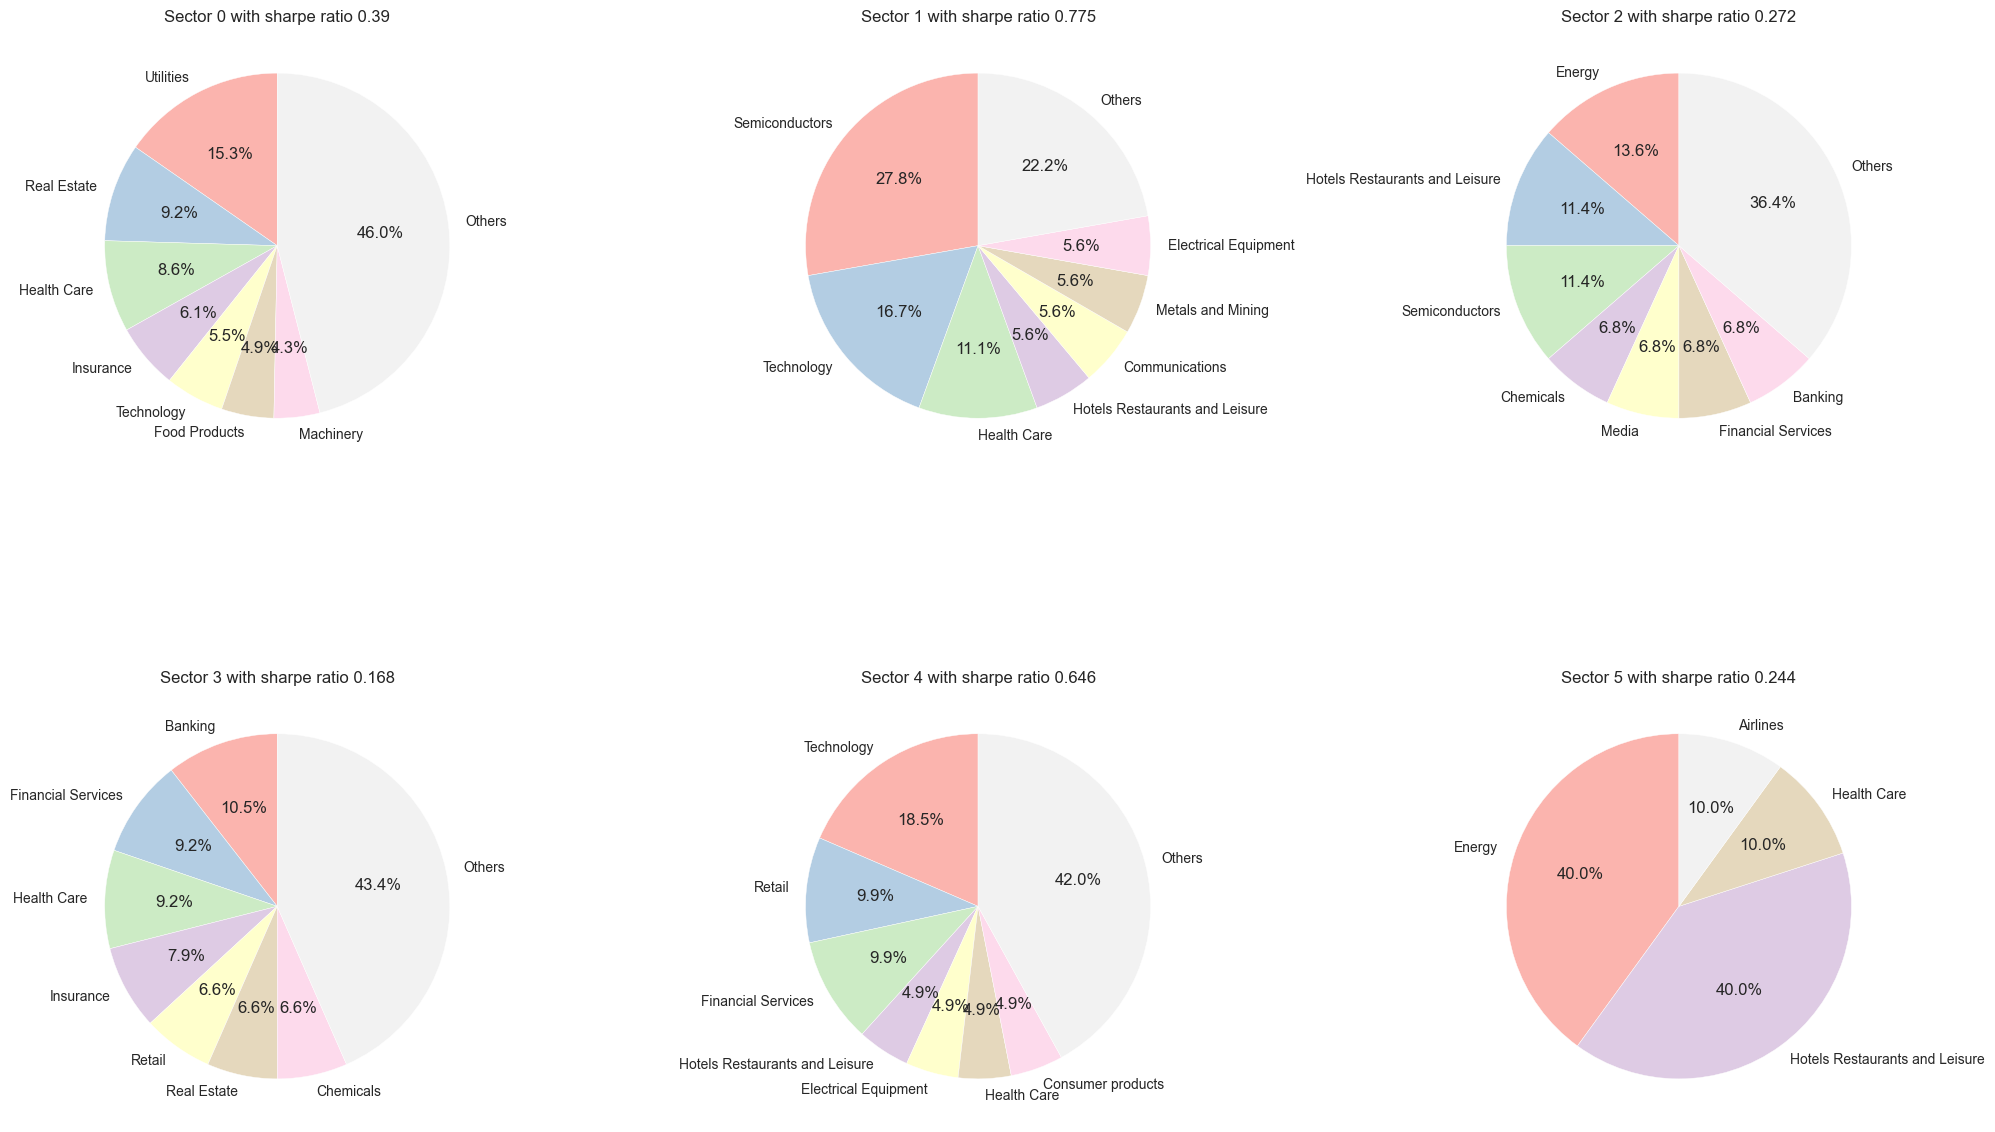

In [316]:
MAX_LABELS = 7
from analysis.data.plotting import plot_cluster_industry
plot_cluster_industry(MAX_LABELS, final_dataframe, cluster_profile)


In [317]:
from analysis.data.dataframe_creation import create_portfolio_clustered
portfolio_ret, asset_ret = create_portfolio_clustered(sd, ed, final_dataframe, list(final_dataframe["Ticker"]), w = "sharpe")


[*********************100%***********************]  484 of 484 completed


Null values: False
Null values: False


In [322]:
benchmark = yf.download(tickers="SPY", start=sd, end=ed, auto_adjust=True)["Close"]

[*********************100%***********************]  1 of 1 completed


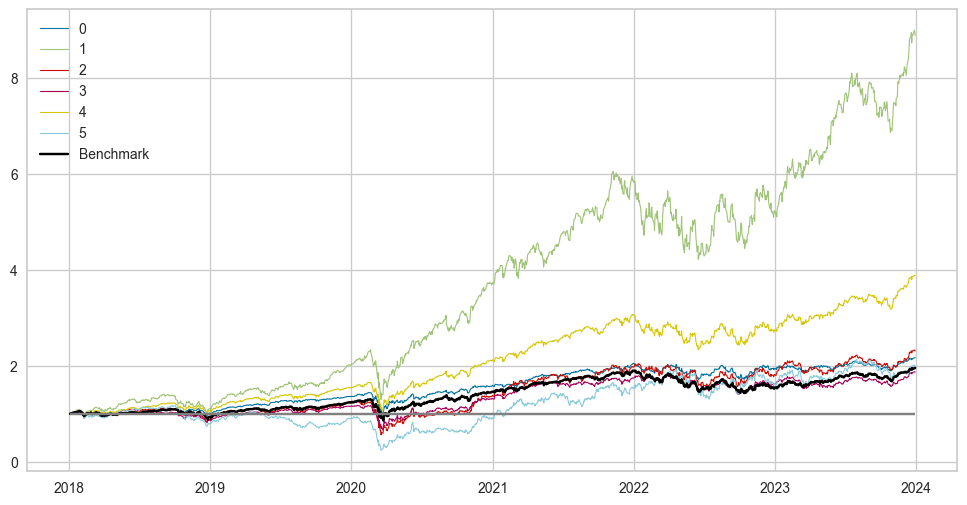

In [326]:
import analysis.data.plotting as plotting
importlib.reload(plotting)
from analysis.data.plotting import portfolio_evolution_time
portfolio_evolution_time(portfolio_ret.reset_index(), benchmark.reset_index())

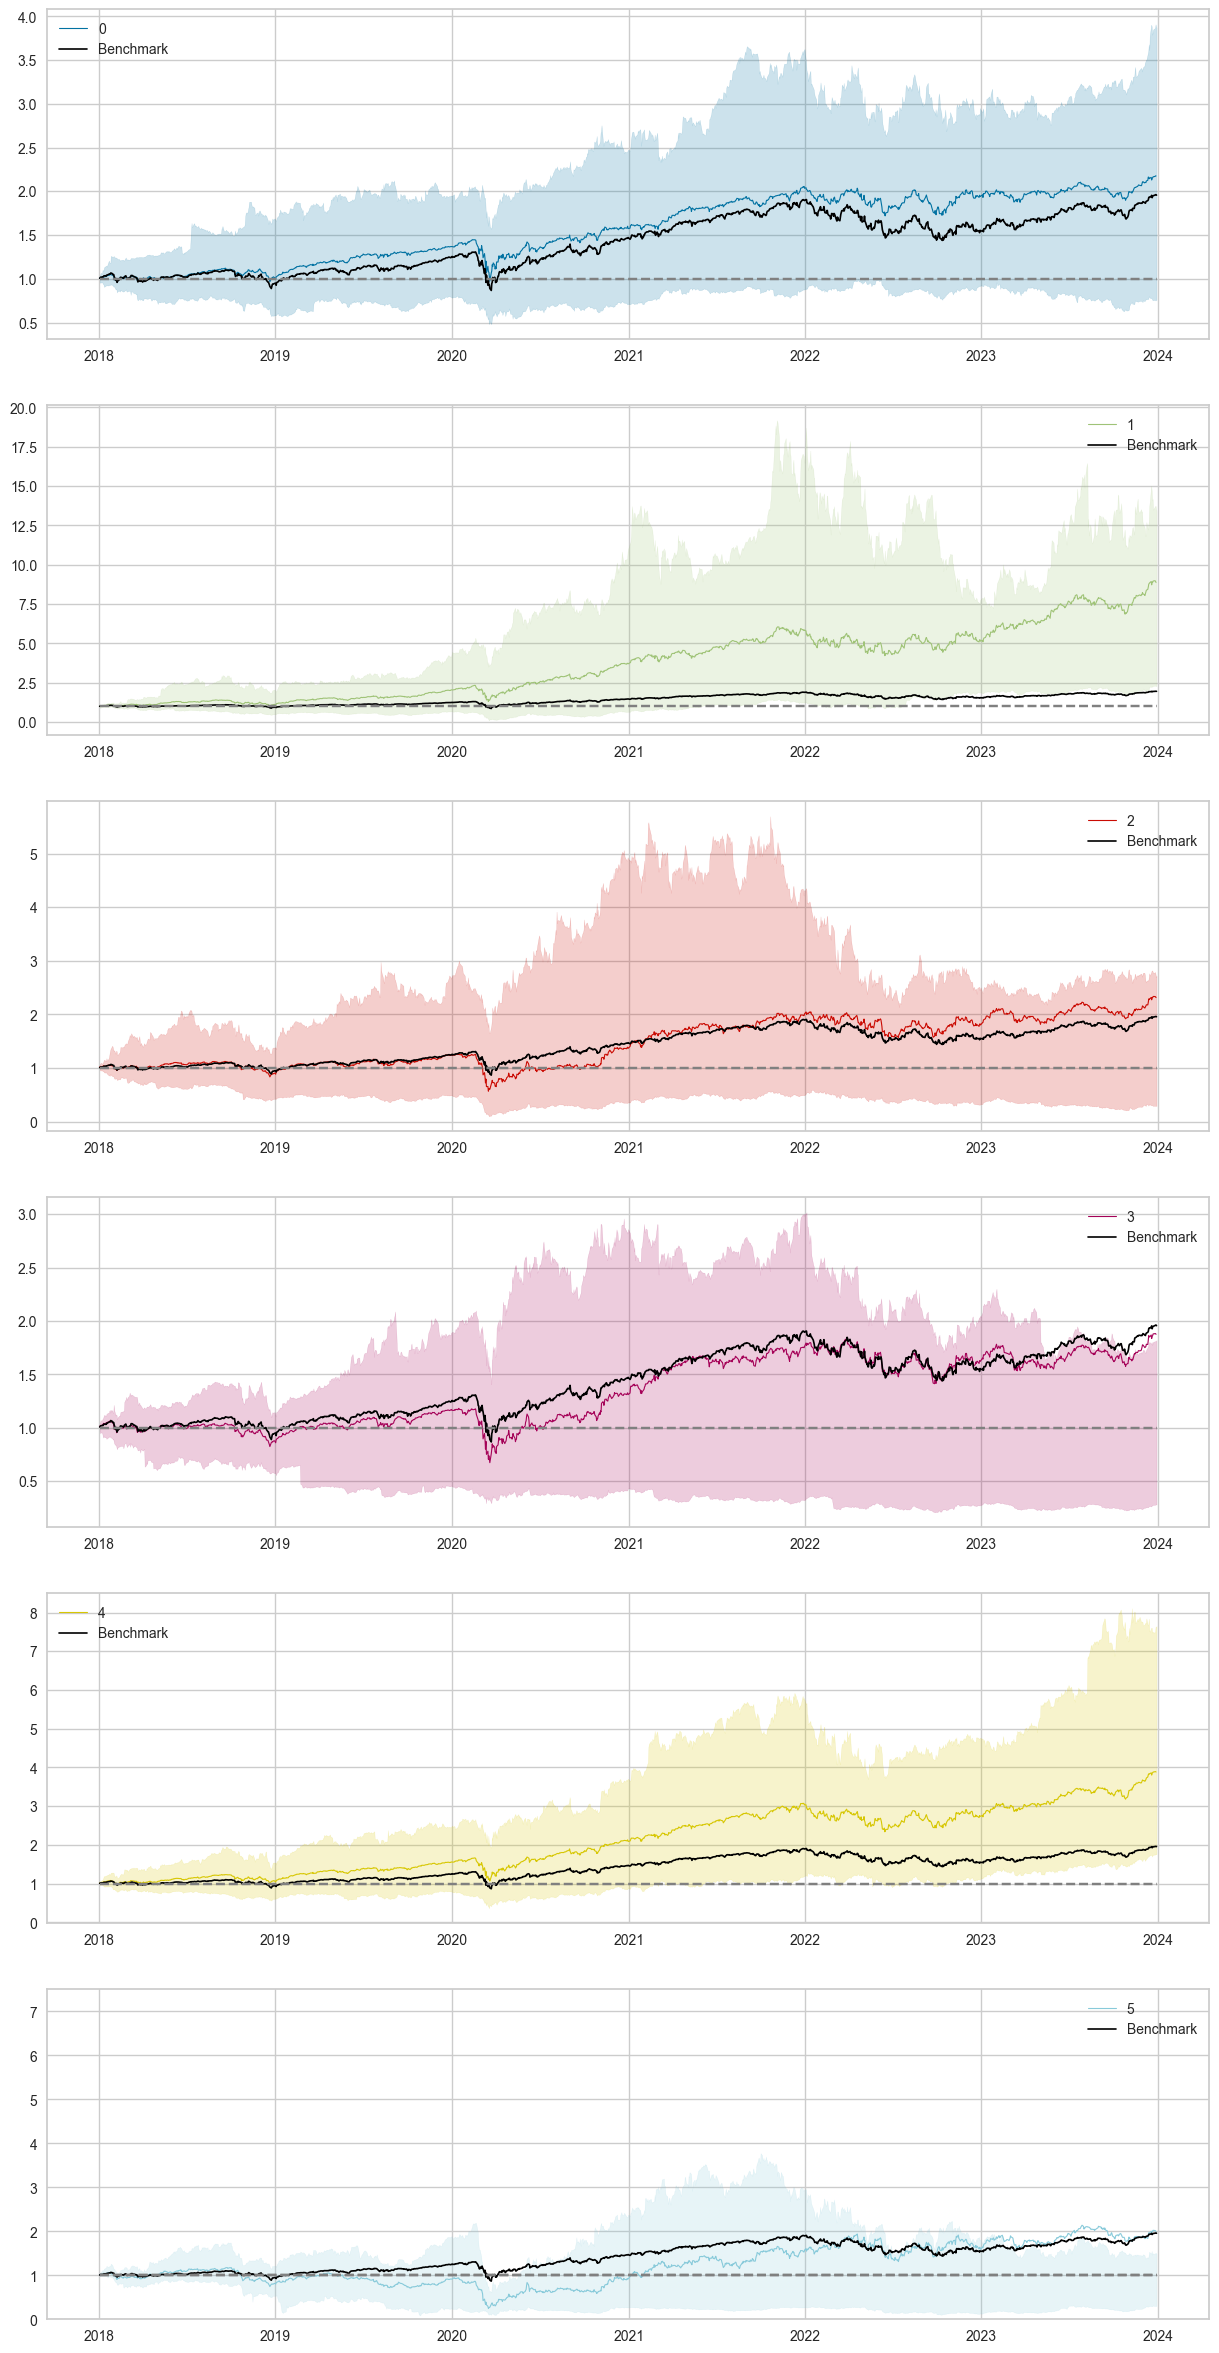

In [324]:
from analysis.data.plotting import portfolio_span
portfolio_span(asset_ret, portfolio_ret, final_dataframe, benchmark, N_SECTORS)

In [327]:
sd_test = ed
ed_test = "2025-01-10"
portfolio_ret_t, asset_ret_t = create_portfolio_clustered(sd_test, ed_test, final_dataframe, list(final_dataframe["Ticker"]), w="sharpe")

[*********************100%***********************]  484 of 484 completed

2 Failed downloads:
['PEG', 'FOX']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Null values: False
Null values: False


In [328]:
benchmark_t = yf.download(tickers="SPY", start=sd_test, end=ed_test, auto_adjust=True)["Close"]

[*********************100%***********************]  1 of 1 completed


In [329]:
def weights(ratios, cluster, pow, thresh):
    w = np.array(ratios["Sharpe_ratio"] > thresh)*ratios["Sharpe_ratio"]
    ratios["weights"] = np.power(w, pow)
    ratios["weights"] = ratios["weights"]/np.sum(ratios["weights"])
    return ratios.loc[ratios["Sector"] == cluster, "weights"]

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2024-01-05   2024-01-05
End Period                 2025-01-08   2025-01-08
Risk-Free Rate             2.0%         2.0%
Time in Market             97.0%        100.0%

Cumulative Return          14.63%       27.93%
CAGR﹪                     9.77%        18.32%

Sharpe                     1.46         1.54
Prob. Sharpe Ratio         91.6%        90.9%
Smart Sharpe               1.42         1.5
Sortino                    2.18         2.27
Smart Sortino              2.12         2.21
Sortino/√2                 1.54         1.61
Smart Sortino/√2           1.5          1.56
Omega                      1.29         1.29

Max Drawdown               -4.53%       -9.18%
Longest DD Days            108          64
Volatility (ann.)          8.14%        15.35%
R^2                        0.38         0.38
Information Ratio          0.06         0.06
Calmar                 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2024-07-17,2024-08-05,2024-09-18,64,-9.184162,-8.891287
2,2024-04-01,2024-04-19,2024-05-17,47,-7.409772,-6.709716
3,2024-12-05,2024-12-19,2025-01-08,35,-6.714868,-6.571585
4,2024-10-15,2024-10-31,2024-11-05,22,-3.951516,-3.644850
5,2024-11-12,2024-11-15,2024-11-21,10,-3.488338,-2.684262


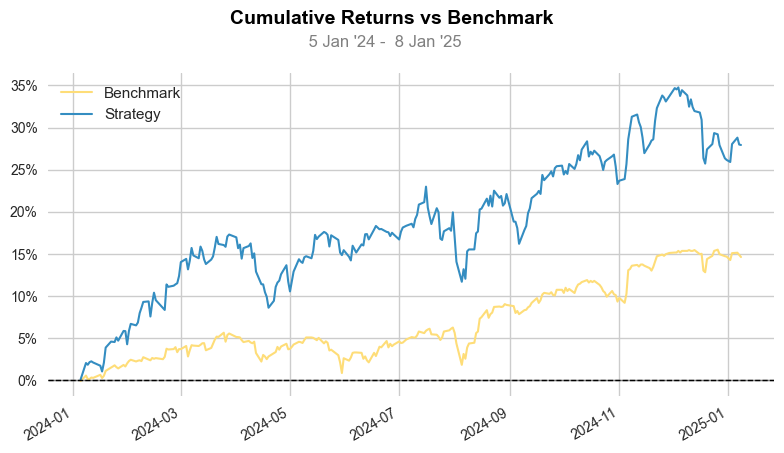

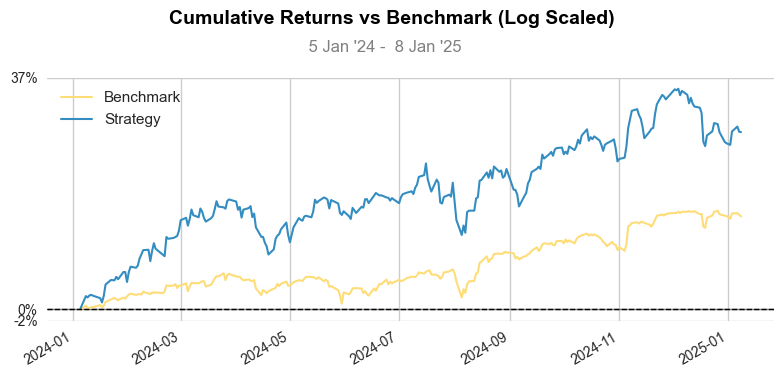

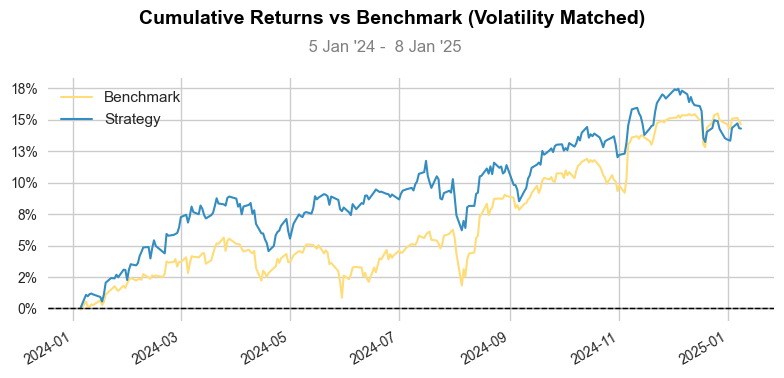

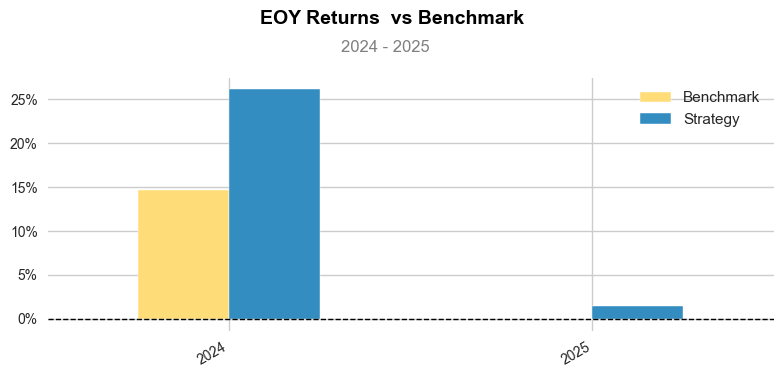

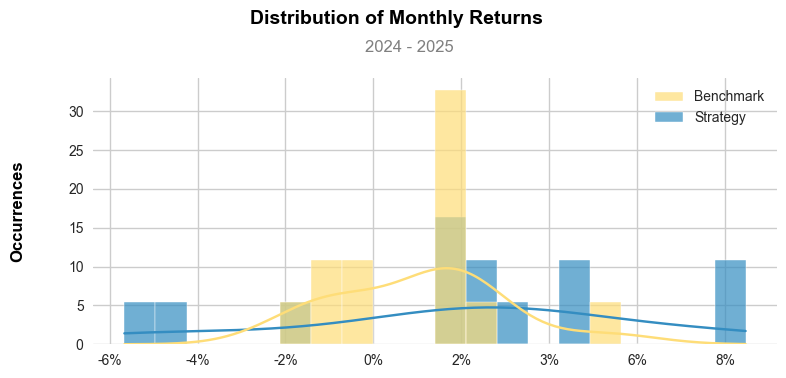

UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [330]:
import quantstats as qs

returns = np.zeros(len(portfolio_ret_t))
cp = cluster_profile.reset_index()
for i in portfolio_ret_t.columns:
        weight = weights(cp[["Sector", "Sharpe_ratio"]], i, 1, 0.25).values[0]
        returns += weight*portfolio_ret_t[i] 
portfolio_performance = pd.DataFrame(returns).reset_index()

portfolio_performance["Date"] = pd.to_datetime(portfolio_performance["Date"])

# Set "Date" as the index
portfolio_performance.set_index("Date", inplace=True)

# Rename the column for better clarity (optional)
portfolio_performance.columns = ["Returns"]

# Ensure the returns are properly formatted and call the quantstats report
qs.reports.full(portfolio_performance["Returns"], benchmark='DJIA', rf=0.02)